# Python for High Performance Computing
# The <span style="font-family: Courier New, Courier, monospace;">multiprocessing</span> library
<hr style="border: solid 4px green">
<br>
<center><img src="../../images/arc_logo.png"; style="float: center; width: 20%"></center>
<br>
## http://www.arc.ox.ac.uk
## support@arc.ox.ac.uk

## Overview
<hr style="border: solid 4px green">

### <span style="font-family: Courier New, Courier, monospace;">multiprocessing</span>
* module introduced in Python 2.6
* designed to exploit multiprocessor systems
* copies (in part) the functionality of the older `threading` library
* uses threads instead of processes, sidestepping the **G**lobal **I**nterpreter **L**ock (GIL) limitations of cPython
<br><br>

### Remember the GIL?
* GIL is a mutex that prevents native threads from executing Python bytecodes concurrently
  * only a single thread can acquire a lock on a Python object or C API at any one time
* it *is* necessary because the interpreter is not thread-safe
  * the GIL protects access to current thread state and heap allocated objects
* but it also prevents Python programs from taking full advantage of multiprocessor systems
* effectively, it is the language's most difficult technical challenge
<br><br>

> *Note*:
* the `threading` library does not bypass the GIL, so it is useless for computation
* but can be useful for code that is I/O or network bound

## Overview (cont'd)
<hr style="border: solid 4px green">

### <span style="font-family: Courier New, Courier, monospace;">multiprocessing</span>
* works on any system that runs Python
* spawns processes that can execute tasks concurrently (each process has a separate GIL)
* abstracts the detail of parallel scheduling and execution
<br><br>

### Pros
* straigtforward to use
* can achieve good parallel speedups on trivially parallel problems
<br><br>

### Cons
* not suitable for tightly coupled parallelism (which needs a lot of inter-process communication)
* limited ti single host execution

## Overview (cont'd)
<hr style="border: solid 4px green">
  
### <span style="font-family: Courier New, Courier, monospace;">multiprocessing</span> works by
* assigning tasks to processes
* executing the processes
<br><br>

### Ideal use: trivial parallelism
* tasks assigned to processes are independent and
* task data is local to the process
<br><br>

### There is more...
* the library offers a lot more (*e.g.* communication between processes)
* arguably, tightly coupled parallelism is better tackled by other solutions, *e.g.* `mpi4py`

## Trivial parallelism
<hr style="border: solid 4px green">

### Trivially parallel workloads
* independent tasks that only need minimal communication or synchronisation
* ideally, tasks are balanced -- all tasks have a fixed computational cost
<br><br>

### Examples
* mapping a single function to multiple data
* parameter sweep
* map-reduce

## Example
<hr style="border: solid 4px green">
  
### The simplest way to use the library is via the <span style="font-family: Courier New, Courier, monospace;">Process</span> class
<br><br>

### A "hello world" example
* initialise a number of processes
* each processes is assigned a task
* each process has an associated argument (passed on to the task function)
* each process is started independently

In [1]:
import multiprocessing

def func (num):
    print "hello from worker", num

if __name__ == "__main__":
    for i in range(4):
        p = multiprocessing.Process (target=func, args=(i,))
        p.start ()

hello from worker 0
hello from worker 1
hello from worker 2
hello from worker 3


## Example (cont'd)
<hr style="border: solid 4px green">

### A slightly enhanced "hello world" example
* print process information: from OS as well as from from library
* number of processes equals the number of cores available (counting hyperthreading)

In [2]:
import multiprocessing
import os

def func (num):
    print "hello from worker", num, "process", os.getpid(), "name", multiprocessing.current_process().name
    return

if __name__ == "__main__":
    for i in range(multiprocessing.cpu_count()):
        p = multiprocessing.Process (target=func, args=(i,))
        p.start ()

hello from worker 0 process 2893 name Process-5
hello from worker 1 process 2894 name Process-6
hello from worker 2 process 2895 name Process-7
hello from worker 3 process 2896 name Process-8
hello from worker 4 process 2897 name Process-9
hello from worker 5 process 2898 name Process-10
hello from worker 6 process 2899 name Process-11
hello from worker 7 process 2900 name Process-12


## <span style="font-family: Courier New, Courier, monospace;">multiprocessing</span> classes
<hr style="border: solid 4px green">

### Two very important classes
* `Process` -- represents activity that is run in a separate process
* `pool` -- controls a pool of "worker" processes to which tasks are asigned
<br><br>

### Other classes exist
* examples include `Queue`, `Pipe`, `Lock`, `Manager`, `Connection`
* allow quite sophisticated programming (including inter-process communication)
* arguably, usefulness to scientific computing is limited

## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class
<hr style="border: solid 4px green">

### <span style="font-family: Courier New, Courier, monospace;">pool</span>
* the most important (and usefull class)
* particularly useful for trivial parallelism
<br><br>

### Caveats
* the `pool` class methods should only be used by the process which created the pool
* the `__main__` module should be importable by the children processes
  * some examples involving `pool` will not work in the interactive interpreter

## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class: task offloading
<hr style="border: solid 4px green">

### The <span style="font-family: Courier New, Courier, monospace;">pool</span> class hides the complexity of concurrent programing
* you do not have to worry about managing processes or shared data
* you do not have to worry about distributing the work between workers
<br><br>

### All that a program needs is
* open a pool of processes
* offload tasks to processes in the pool
<br><br>

### Two types of methods to offload tasks
* `map` (and `map_async`) -- map a function to arguments from an iterable
* `apply` (and `apply_async`) -- apply a function to a set of arguments

## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class: <span style="font-family: Courier New, Courier, monospace;">map</span>
<hr style="border: solid 4px green">

### <span style="font-family: Courier New, Courier, monospace;">map</span> and <span style="font-family: Courier New, Courier, monospace;">map_async</span>
* map a function to arguments from an iterable
* similar to Python built-in `map`
* the iterable is automatically divided into "chunks" of tasks that are scheduled to be executed by separate processes in the pool
* each process executes more than one task, going through its "chunk" of work sequentially
<br><br>

### Usage:
* a single same function / task needs to be mapped to a set of multiple similar arguments

## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class: <span style="font-family: Courier New, Courier, monospace;">apply</span>
<hr style="border: solid 4px green">

### <span style="font-family: Courier New, Courier, monospace;">apply</span> and <span style="font-family: Courier New, Courier, monospace;">apply_async</span>
* apply a function to a set of arguments
* similar to Python built-in `apply`
* tasks are placed in a queue of execution
* each process executes more than one task
* tasks may be executed out of order
<br><br>

### Usage:
* multiple functions / tasks needs to be mapped to a set of multiple (possibly dissimilar) arguments
* `map` is a particular case of `apply`
* `apply` allows the programmer greater flexibility

## Example
<hr style="border: solid 4px green">

### Unique function to multiple data
* `map` is simpler than `apply`
* `data` is a list (iterable)

In [3]:
import multiprocessing

def func (x):
    return x*x

if __name__ == '__main__':
    # start a pool with 2 processes
    pool = multiprocessing.Pool(2)
    # data list
    data = [1, 2, 3, 4, 5, 6, 7]
    # map a function to some data
    print (pool.map (func, data))
    # apply a function to the same data
    results = [ pool.apply (func, args = (d, )) for d in data ]
    print results

[1, 4, 9, 16, 25, 36, 49]
[1, 4, 9, 16, 25, 36, 49]


## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class: properties
<hr style="border: solid 4px green">

### Four choices
* `map` and `map_async`
* `apply` and `apply_async`
<br><br>

### Three important properties
* scheduling
  * `map` / `map_async` are mapped directly
  * `apply` / `apply_async` use a task queue
* blocking
  * the asynchronous variants are non-blocking; processing carry on after their call, without waiting for returned results
* ordering
  * the asynchronous variants are mapped / applied in arbitrary order to the "targets"

## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class: a few more methods
<hr style="border: solid 4px green">

### <span style="font-family: Courier New, Courier, monospace;">close()</span>
* closes a pool, preventing any more tasks from being submitted to the pool
* once all the tasks completed, the worker processes exit and resources freed
<br><br>

### <span style="font-family: Courier New, Courier, monospace;">join()</span>
* join the worker processes from a pool, waiting for them to exit
* `close()` must be called before using `join()`
<br><br>

### <span style="font-family: Courier New, Courier, monospace;">close()</span> and <span style="font-family: Courier New, Courier, monospace;">join()</span> are usually used together
* typically called at end of the parallelisable part of the program
* ensure the tasks are completed before results can be used
<br><br>

### <span style="font-family: Courier New, Courier, monospace;">get()</span>
* retrieve results from the objects returned by `map` or `apply` (or their asynchronous variants)
* it is blocking
<br><br>

### The asynchronous methods accept callback functions
* these are useful to perform useful actions on the results
* can be used instead of `get()` to retrieve results

## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class: properties (a summary)
<hr style="border: solid 4px green">

| Method        | Scheduling    | Blocking     | Ordering                 | Callback function |
| :------------ | :------------ | :----------- | :----------------------- | :---------------: |
| `map`         | direct map    | blocking     | tasks executed in order  |       N           |
| `map_async`   | direct map    | non-blocking | tasks out of order       |       Y           |
| `apply`       | uses queue    | blocking     | tasks executed in order  |       N           |
| `apply_async` | uses queue    | non-blocking | tasks out of order       |       Y           |

## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class: blocking and non-blocking <span style="font-family: Courier New, Courier, monospace;">map</span>
<hr style="border: solid 4px green">

In [ ]:
# %load test_map.py
#!/usr/bin/env python

import multiprocessing
import numpy

def func (x):
    print x

if __name__ == '__main__':
    
    # some data
    x1 = numpy.arange(8)
    x2 = x1 + 100

    # open pool
    pool = multiprocessing.Pool (2)

    # MAP
    res = pool.map (func, x1)
    print "MAP FINISHED"

    # MAP_ASYNC
    res = pool.map_async (func, x2)
    print "MAP_ASYNC FINISHED"
    res.wait ()

    # close
    pool.close ()
    pool.join ()


In [4]:
!python test_map.py

0
1
2
3
4
5
6
7
MAP FINISHED
MAP_ASYNC FINISHED
100
101
102
103
104
105
106
107


## The <span style="font-family: Courier New, Courier, monospace;">pool</span> class: blocking and non-blocking <span style="font-family: Courier New, Courier, monospace;">apply</span>
<hr style="border: solid 4px green">

In [ ]:
# %load test_apply.py
#!/usr/bin/env python

import multiprocessing
import numpy

def func (x):
    print x

if __name__ == '__main__':
    
    # some data
    x1 = numpy.arange(8)
    x2 = x1 + 100

    # open pool
    pool = multiprocessing.Pool (2)

    # APPLY
    res = [ pool.apply (func, args = (xi, )) for xi in x1 ]
    print "APPLY FINISHED"

    # APPLY_ASYNC
    out = [ pool.apply_async (func, args = (xi, )) for xi in x2 ]
    print "APPLY_ASYNC FINISHED"

    # close
    pool.close ()
    pool.join ()


In [5]:
!python test_apply.py

0
1
2
3
4
5
6
7
APPLY FINISHED
APPLY_ASYNC FINISHED
100
101
102
103
104
105
106
107


## Performance note
<hr style="border: solid 4px green">

### Spawned processes are fed data by the process that owns the pool
* amount of data has to be minimal, otherwise performance suffers
* data is *pickled* before it is fed to spawned processes
<br><br>

### Minimise quantity of data passed to processes
* `map`: small number of function arguments, little data
* `apply`: tasks with little input data

## Mapping functions with multiple parameters
<hr style="border: solid 4px green">

### Mapping processes to data is easy

In [8]:
import multiprocessing

def func (num):
    print "hello from worker", num

if __name__ == "__main__":
    data  = [1, 2, 3, 4]
    pool = multiprocessing.Pool (4)
    res = pool.map( func, data )

hello from worker 1
hello from worker 2
hello from worker 3
hello from worker 4


### But what multiple arguments?

In [6]:
def func (num, val):
    print "hello from worker", num, "with value", val

func (2, 2.)

hello from worker 2 with value 2.0


### Simplest option: use tuples

In [7]:
import multiprocessing

def func ((num, val)):
    print "hello from worker", num, "with value", val

if __name__ == "__main__":
    data = [(1,1.0), (2,2.), (3,3.), (4,4.)]
    pool = multiprocessing.Pool (4)
    res = pool.map( func, data )

hello from worker 3 with value 3.0
hello from worker 2 with value 2.0
hello from worker 1 with value 1.0
hello from worker 4 with value 4.0


### Other options
* Python 3 has the `pool.starmap()` method

## <span style="font-family: Courier New, Courier, monospace;">multiprocessing</span>, pickling and object-oriented programming
<hr style="border: solid 4px green">

### A word of caution
<br><br>

### Pickling
* the process whereby a Python object hierarchy is converted into a byte stream, or "serialised"
* used by `multiprocessing` to pass data to spwaned processes
<br><br>

### Bound methods are not picklable
* attempting to use `map` or `apply` with classes fails with

```cPickle.PicklingError: Can't pickle <type 'instancemethod'>: attribute lookup __builtin__.instancemethod failed```

* workaround uses `copy_reg`, a module to register pickle support functions

## A Monte Carlo example
<hr style="border: solid 4px green">

### A physical problem
* find the terminal velocity of a falling body of given mass
* forces acting on the body are weight and drag
* finding the terminal velocity involves the solution to an **O**rdinary **D**ifferential **E**quation (ODE)
<br><br>

### Dealing with uncertainties
* the "drag" coefficient is assumed a normal random variable of given mean and variance
* takes into account possible variations in the shape of the body
* the terminal velocity is thus a random variable itself

## A Monte Carlo example (cont'd)
<hr style="border: solid 4px green">

### The Monte Carlo method
* a broad class of computational algorithms based on repeated random sampling to obtain numerical results
* original application: the numerical calculation of multidimensional definite integrals with complicated boundaries
* modern applications vary widely
  * modelling uncertainties in engineering and physical problems
  * evaluating financial derivatives in computational finance
  * Bayesian inference in phylogeny (computational biology)
<br><br>

### The Monte Carlo example
* generate a large number of values for the random variable on which the physical problem depends
* solve the same physical problem for each such value
* a statistical sample for the solution of the problem is found

## A Monte Carlo example (cont'd)
<hr style="border: solid 4px green">

### Implementation
| Class | Methods | Function |
| :--- | :--- | :--- | 
| `fallingBodyProblem` | `ode`      | Initialise parameters |
|                      | `solution` | Solve ODE (using `odeint`) |
|  `fallingBodyStats`  | `solutionWrapper` | Generates a single solution to the falling body problem |
|                      | `solutionStats` | Generates a number of solutions to the falling body problem |
|                      | `solutionStatsMultiProcessing` | Same as `solutionStats` but in parallel |

## A Monte Carlo example (cont'd)
<hr style="border: solid 4px green">

### Serial implementation of MC
```python
    def solutionStats (self):
        """
        solutionStats -- generates terminal velocity statistics from a
                         distribution of air resistance values
        """
        # sample of air resistance values
        resistanceValues = self.resistanceMean + self.resistanceVar * numpy.random.randn (self.sampleSize)

        # vector to store final velocities
        finalVelocities = numpy.zeros (self.sampleSize)
        counterVelocities = 0

        # run across the entire sample
        for resistance in resistanceValues:
            # set problem
            finalVelocities [counterVelocities] = self.solutionWrapper (resistance)
            counterVelocities += 1

        return finalVelocities
```

## A Monte Carlo example (cont'd)
<hr style="border: solid 4px green">

### Parallel implementation of MC
```python
    def solutionStatsMultiProcessing (self, numProcs=2):
        """
        solutionStatsMultiProcessing -- generates terminal velocity statistics from a
                                        distribution of air resistance values
                                        (parallel processing using the multiprocessing module)
        """
        # sample of air resistance values
        resistanceValues = self.resistanceMean + self.resistanceVar * numpy.random.randn (self.sampleSize)

        # vector to store final velocities
        finalVelocities = numpy.zeros (self.sampleSize)
        counterVelocities = 0

        # open a pool
        procPool = multiprocessing.Pool (numProcs)

        rawResults = procPool.map_async( self.solutionWrapper, resistanceValues )
        rawResults.wait () # not strictly necessary
        finalVelocities = rawResults.get () # get() is blocking

        # clean up pool
        procPool.close () # close task pool (cannot submit new tasks from here on)
        procPool.join ()  # __main__ must wait for all tasks to complete

        return finalVelocities
```

## A Monte Carlo example: results
<hr style="border: solid 4px green">

In [8]:
% matplotlib inline
! python test_multiprocessing.py 0.01 0.001 100.0 2000 16000 4

 serial implementation
 serial stats time = 5.425464
 multiprocessing implementation using 4 processes
 parallel stats time = 1.470297


## A Monte Carlo example: results on the ARC cluster
<hr style="border: solid 4px green">

### Compute nodes
* 16 cores (Intel Xeon Haswell)
* 64GB RAM (or more)
<br><br>

### The test
* comment out the serial part
* run with the command
```
for numthreads in 1 2 4 6 8 10 12 14 16; do
  python test_multiprocessing.py 0.01 0.001 100.0 2000 160000 $numtreads
done 2>&1 | tee test_multiprocessing.times.raw
```
* process raw results
* plot parallel scaling results

## A Monte Carlo example: results on the ARC cluster (cont'd)
<hr style="border: solid 4px green">

In [45]:
# extract number of processes
!grep "multiprocessing implementation" test_multiprocessing.times.raw | awk '{print $4}' > test_multiprocessing.times
# extract and append processing time
!grep "parallel stats" test_multiprocessing.times.raw | awk '{print $5}' >> test_multiprocessing.times
# this is what the file read in Python looks like
!cat test_multiprocessing.times

1
2
4
6
8
10
12
14
16
49.969022
25.264540
13.745896
9.144087
7.348700
6.219468
5.155684
4.603014
4.185782


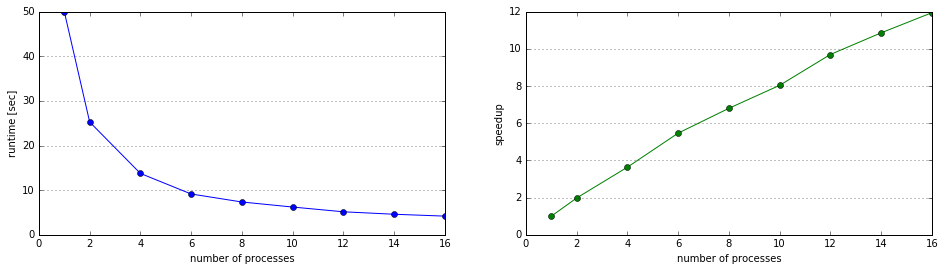

In [4]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt ("test_multiprocessing.times")
data = data.reshape([2,-1])
# control figure size
plt.figure (figsize = (16, 4))
# wallclock time plot
plt.subplot (1, 2, 1)
plt.plot (data[0, :], data[1, :], 'bo-')
plt.xlabel ("number of processes")
plt.ylabel ("runtime [sec]")
axes = plt.gca ()
axes.yaxis.grid ()
# speedup plot
plt.subplot (1, 2, 2)
plt.plot (data[0, :], data[1, 0] / data[1, :], 'go-')
plt.xlabel ("number of processes")
plt.ylabel ("speedup")
axes = plt.gca()
axes.yaxis.grid ()
# show plot
plt.show ()

## Summary: the <span style="font-family: Courier New, Courier, monospace;">multiprocessing</span> module
<hr style="border: solid 4px green">

### The good
* easy to use, particularly on trivially parallel problems
* good speedups can be achieved with little work
<br><br>

### The bad
* execution limited to a single node
* good performance limited to trivially parallel problems

## Beyond single node
<hr style="border: solid 4px green">

### Distributed solutions
* `SCOOP` (**S**calable **CO**ncurrent **O**perations in **P**ython)
  * provides a parallel `map` implementation
  * works across multiple cores, across multiple hosts
* `pathos`
  * a `map` interface that meets and extends the Python `map` standard
  * submits service requests to a selection of servers
  * tunnels server communications with `ssh`
* `pyro` (**Py**thon **r**emote **o**bjects)
  * objects that can talk to each other over the network
  * written entirely in Python (easy to install, portable)
<br><br>

> https://wiki.python.org/moin/DistributedProgramming

<img src="../../images/reusematerial.png"; style="float: center; width: 90"; >